In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd

result = 'OLFR2_vs_GPI1.corrected.csv'
comparison = pd.read_csv(result)

comparison_sig = (comparison.loc[comparison['ttest_pval'] < 0.05])
comparison_insig = (comparison.loc[comparison['ttest_pval'] >= 0.05])

trace0 = go.Scatter(
    #x = -np.log10(comparison_sig['ttest_pval']),
    x = comparison_sig['Log2FoldChange'],
    #y = comparison_sig['Log2FoldChange'],
    y = -np.log10(comparison_sig['ttest_pval']),
    name = 'Above',
    mode = 'markers',
    text= comparison_sig['Metabolite'],
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    #x = -np.log10(comparison_insig['ttest_pval']),
    x = comparison_insig['Log2FoldChange'],
    y = -np.log10(comparison_insig['ttest_pval']),
    #y = comparison_insig['Log2FoldChange'],
    name = 'Below',
    mode = 'markers',
    text= comparison_insig['Metabolite'],
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = result.split('.')[0],
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='Volcano.html')


'Volcano.html'

'Heatmap.html'

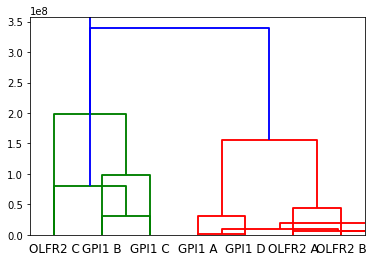

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import scipy.cluster.hierarchy as shc
#import matplotlib as plt
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  
import pandas as pd
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')


### Perform Hierarchical Clustering on Metabolites & Samples
### Z-score Normalize Heatmap
### Generate Plotly Heatmap


values = pd.read_csv('Intensity.values.csv')
values.index = values['Metabolite']
del values['Metabolite']

values_t = values.T
values_t.index.name = 'Sample'


#plt.figure(figsize=(10, 7))  
#plt.title("Customer Dendograms")  

dend_metabolite = shc.dendrogram(shc.linkage(values, method='ward'),labels=values.index)  
dend_metabolite_order = dend_metabolite['ivl']


dend_sample = shc.dendrogram(shc.linkage(values_t, method='ward'),labels=values_t.index)  
dend_sample_order = dend_sample['ivl']

df = values[dend_sample_order]
df = df.reindex(dend_metabolite_order)



values_t = values.T
values_t.index.name = 'Sample'

#plt.figure(figsize=(10, 7))  
#plt.title("Customer Dendograms")  

dend_metabolite = shc.dendrogram(shc.linkage(values, method='ward'),labels=values.index)  
dend_metabolite_order = dend_metabolite['ivl']


dend_sample = shc.dendrogram(shc.linkage(values_t, method='ward'),labels=values_t.index)  
dend_sample_order = dend_sample['ivl']

df = values[dend_sample_order]
df = df.reindex(dend_metabolite_order)
#df.index.name = 'Metabolite'



df_zscore = df.apply(
            lambda V: scale(V,axis=0,with_mean=True, with_std=True,copy=False),axis=1)


trace = go.Heatmap(z=np.array(df_zscore),x=dend_sample_order,y=dend_metabolite_order)
data=[trace]


plotly.offline.plot(data, filename='Heatmap.html')

In [3]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial.distance import pdist, squareform



new_df = np.array(tuple(map(tuple, df_zscore)))
new_df = new_df.T
labels = (dend_metabolite_order)


figure = ff.create_dendrogram(new_df, orientation='bottom', labels=labels)
for i in range(len(figure['data'])):
    figure['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(new_df, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    figure.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(new_df)
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves, 
        y = dendro_leaves,
        z = (new_df),    
        colorscale = 'Blues'
    )
]

heatmap[0]['x'] = figure['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    figure.add_trace(data)

# Edit Layout
figure['layout'].update({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
figure['layout']['xaxis'].update({'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
figure['layout'].update({'xaxis2': {'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""}})

# Edit yaxis
figure['layout']['yaxis'].update({'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""})
# Edit yaxis2
figure['layout'].update({'yaxis2':{'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""}})


plotly.offline.plot(figure, filename='Heatmap.test.html')

'Heatmap.test.html'

In [200]:
data = np.genfromtxt("http://files.figshare.com/2133304/ExpRawData_E_TABM_84_A_AFFY_44.tab",
                     names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")
data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()
labels = data.dtype.names



In [265]:

new_df = (tuple(map(tuple, df_zscore)))
# new_df = new_df.view((np.float,len(dend_sample_order)))
# #new_df = df_zscore.T
# new_labels = df_zscore.dtype.names



In [266]:
new_df[0]

(-0.494498481923351,
 -1.4755219809435924,
 -1.1971001070090161,
 0.21646569958611092,
 0.6446119786488796,
 1.0435715537055281,
 1.2624713379354409)

In [267]:
data[0]

(6.3739767, 6.4981704, 6.271771, 6.0920415, 6.095927, 6.231528, 6.224557, 6.08838, 6.434522, 6.021769, 6.217328, 6.687939, 6.225536, 6.674436, 6.164399, 5.216565, 6.543141, 5.2118945, 6.68567, 5.9021454, 5.933372, 7.1124387, 5.318629, 6.2156105, 6.1803956, 6.1591606, 6.112102, 6.359853, 6.010906)

In [224]:
new_df.T.shape

(7, 147)

In [118]:
data_array[0]

array([ 6.3739767,  5.986182 ,  7.468118 , ..., 11.745089 , 13.277803 ,
       13.067169 ])

In [112]:
test = df_zscore.values

In [119]:
test.shape

(147,)

In [254]:

new_df = np.array(tuple(map(tuple, df_zscore)))

#new_df = new_df.T
labels = tuple(dend_sample_order)

print(new_df)
#figure = ff.create_dendrogram(new_df, orientation='bottom', labels=labels)

[[-0.49449848 -1.47552198 -1.19710011 ...  0.64461198  1.04357155
   1.26247134]
 [-0.93626585 -1.18348541 -1.01211886 ...  0.2306346   1.00257252
   1.59647112]
 [-0.58669146 -1.3591753  -1.04637689 ...  0.19152726  1.1127781
   1.55601036]
 ...
 [-1.3073906  -1.23865658 -0.8375837  ...  0.98153689  0.47493021
   1.03051374]
 [-0.43701408 -1.06238313 -1.10867031 ...  0.07903126  1.42317177
   1.50374215]
 [-1.45131165 -0.98379741 -0.39947543 ...  1.13949714  0.16849781
  -0.03488237]]


In [242]:
new_df.shape

(147, 7)

In [233]:
print(tuple(dend_sample_order))

('OLFR2 C', 'GPI1 B', 'GPI1 C', 'GPI1 A', 'GPI1 D', 'OLFR2 A', 'OLFR2 B')


In [243]:
data = np.genfromtxt("http://files.figshare.com/2133304/ExpRawData_E_TABM_84_A_AFFY_44.tab",
                     names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")
data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()
labels = data.dtype.names

# Initialize figure by creating upper dendrogram
figure = ff.create_dendrogram(data_array, orientation='bottom', labels=labels)


In [248]:
data_array.shape

(29, 54674)

In [251]:
data_array = data.view((np.float, len(data.dtype.names)))

In [253]:
type(data)

numpy.ndarray

In [257]:
new_df.view((np.float,len(dend_sample_order)))

<function ndarray.view>